## Notebook to produce Figure 6 for PPP (protein preference photometry) publication

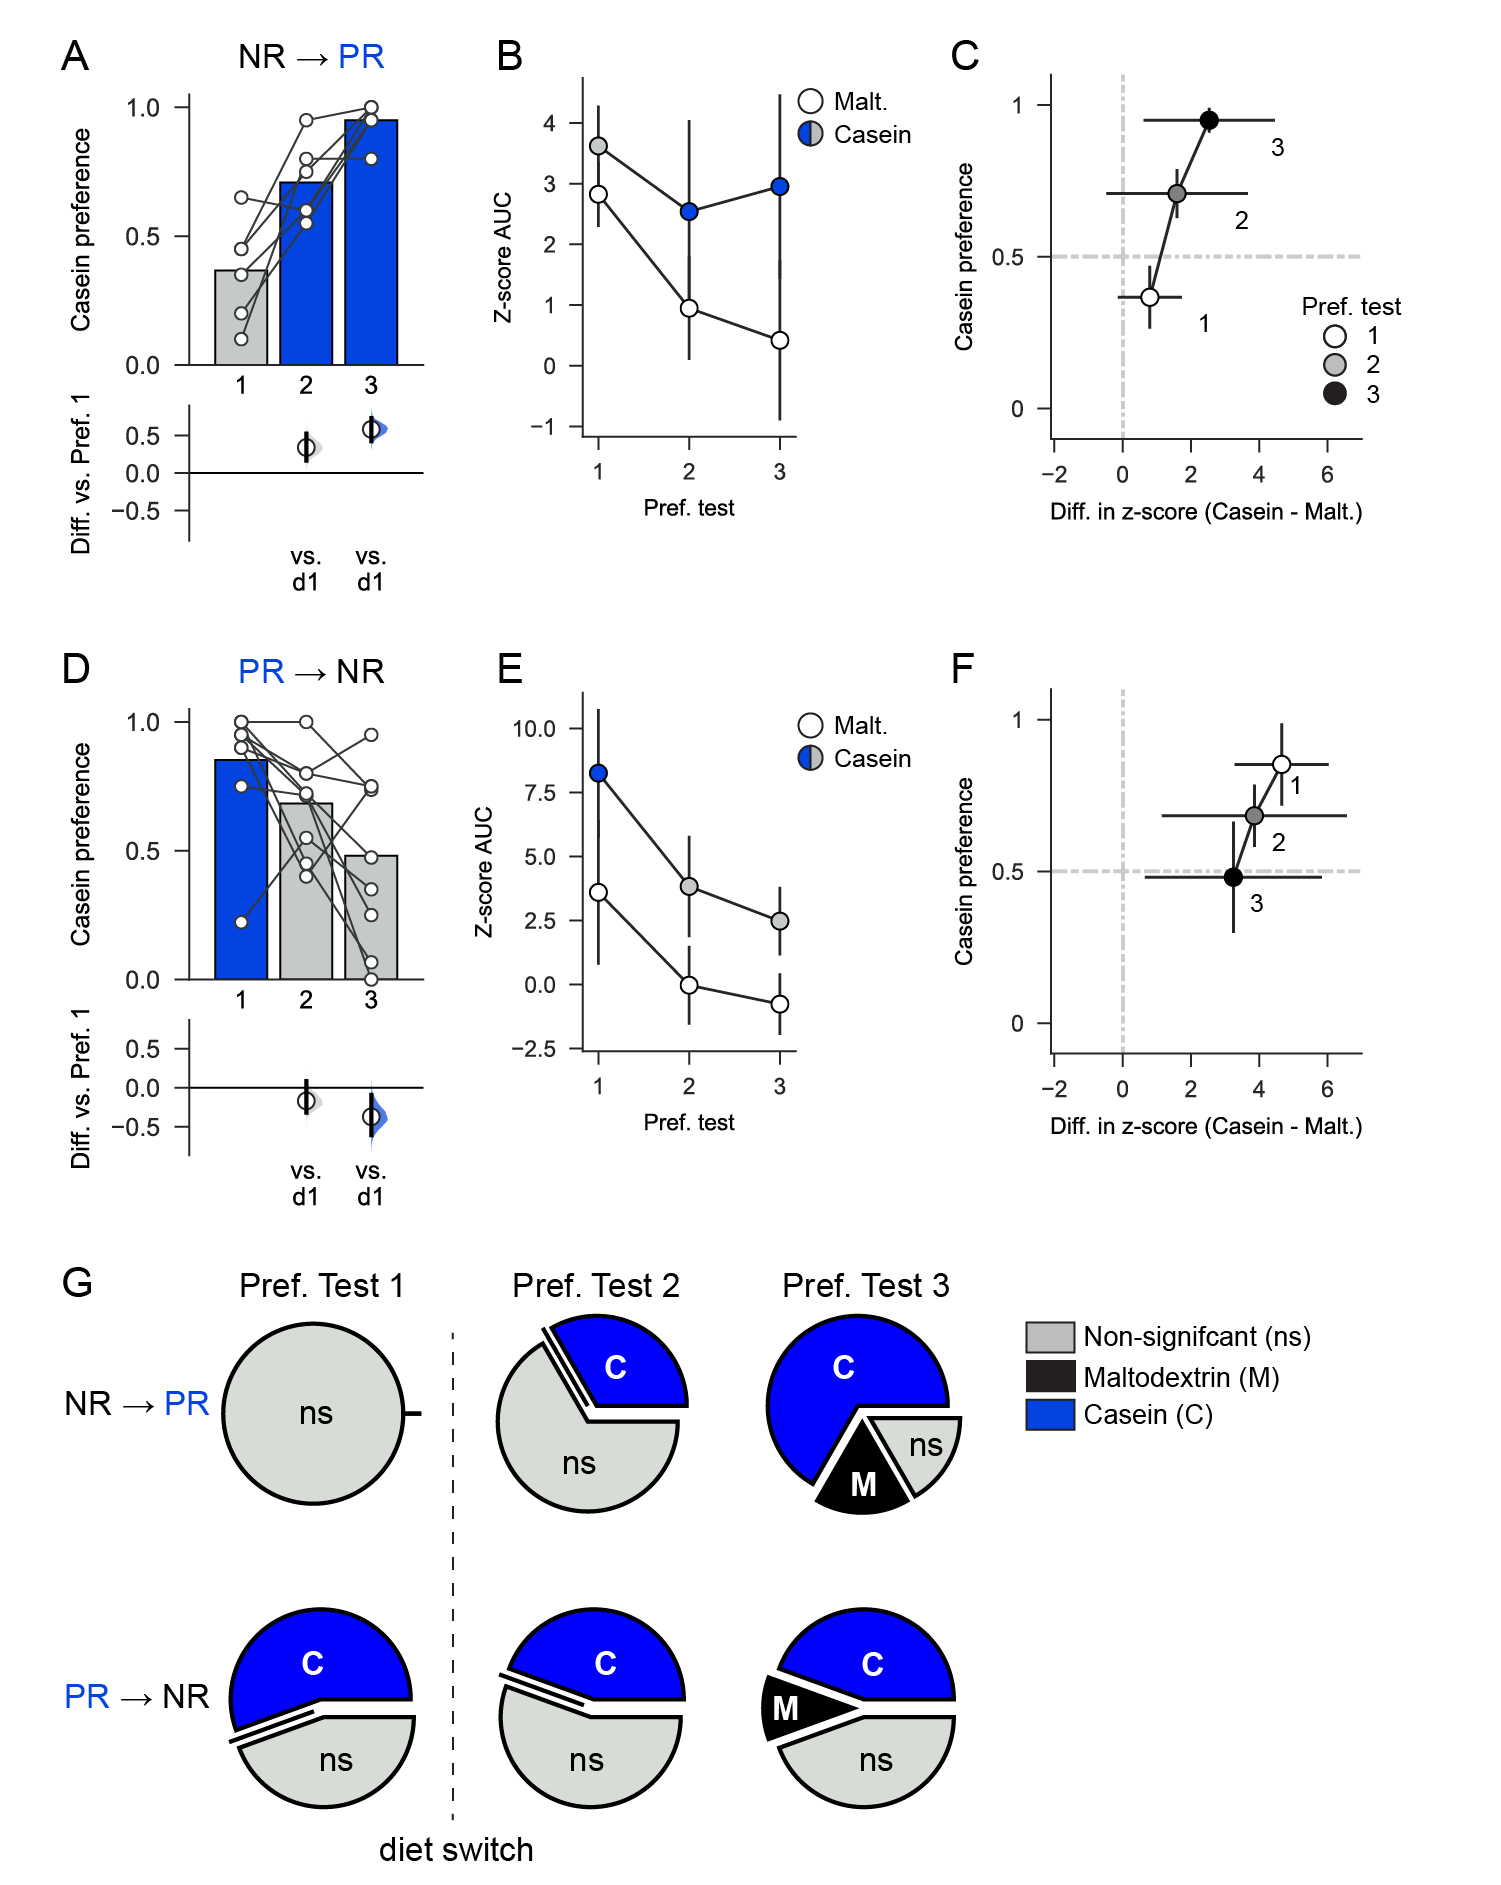

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.transforms as transforms

import dabest as db
import pandas as pd

import trompy as tp

from ppp_pub_figs_settings import *
from ppp_pub_figs_fx import *
# from ppp_pub_figs_supp import *

%matplotlib inline

In [2]:
#Adds control column for calculating vs. 50%
con = [0.5] * 15
df_behav.insert(0, "control", con)

#Initializes details for saving statistics
stats_args = {}
stats_args["file"] = "C:\\Github\\PPP_analysis\\stats\\estimation_stats.xlsx"
stats_args["file"] = "" # Comment this line out to write a new stats file

# with pd.ExcelWriter(stats_args["file"]) as writer:
#     df_behav["control"].to_excel(writer, sheet_name="front")

In [3]:
epoch = [100, 149]

behavkeys = keys = ['pref1', 'pref2', 'pref3']

photokeys = [['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
        ['pref2_cas_licks_forced', 'pref2_malt_licks_forced'],
        ['pref3_cas_licks_forced', 'pref3_malt_licks_forced']]

### Panel 6A - Pref over days for NR to PR rats

No stats file to write to.


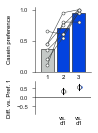

In [4]:
stats_args["sheet"] = "summary_nr"
data, df = prep4estimationstats_summary(df_behav, ["NR"], behavkeys)
fig6A = barscatter_plus_estimation_summary(data, df, colors="control", ylabel="Casein preference", stats_args=stats_args)

### Panel 6B - Photometry over days for NR to PR rats

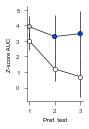

In [5]:
keys = [['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
        ['pref2_cas_licks_forced', 'pref2_malt_licks_forced'],
        ['pref3_cas_licks_forced', 'pref3_malt_licks_forced']]
fig6B = summary_subfig_casmalt(df_photo, "NR", photokeys)

### Panel 6C - Photometry vs. behavior for NR to PR rats

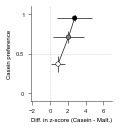

In [6]:
fig6C = summary_subfig_correl(df_behav, df_delta, 'NR', use_zscore_diff=True)

### Panel 6D - Pref over days for PR to NR rats

No stats file to write to.


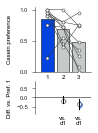

In [7]:
stats_args["sheet"] = "summary_pr"
data, df = prep4estimationstats_summary(df_behav, ["PR"], behavkeys)
fig6D = barscatter_plus_estimation_summary(data, df, colors="expt", ylabel="Casein preference", stats_args=stats_args)

### Panel 6E - Photometry over days for PR to NR rats

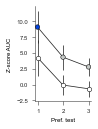

In [8]:
keys = [['pref1_cas_licks_forced', 'pref1_malt_licks_forced'],
        ['pref2_cas_licks_forced', 'pref2_malt_licks_forced'],
        ['pref3_cas_licks_forced', 'pref3_malt_licks_forced']]
fig6E = summary_subfig_casmalt(df_photo, "PR", photokeys)

### Panel 6F - Photometry vs. behavior for PR to NR rats

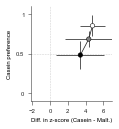

In [9]:
fig6_p6 = summary_subfig_correl(df_behav, df_delta, 'PR', use_zscore_diff=True)

### Panel 6G - Individual rat-by-rat comparisons

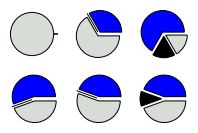

In [10]:
s10_NR = get_proportions(df_pies, "s10", "NR")
s10_PR = get_proportions(df_pies, "s10", "PR")

s11_NR = get_proportions(df_pies, "s11", "NR")
s11_PR = get_proportions(df_pies, "s11", "PR")

s16_NR = get_proportions(df_pies, "s16", "NR")
s16_PR = get_proportions(df_pies, "s16", "PR")

f, ax = plt.subplots(ncols=3, nrows=2, figsize=(3, 2))

makepie(s10_NR, ax[0][0])
makepie(s10_PR, ax[1][0])

makepie(s11_NR, ax[0][1])
makepie(s11_PR, ax[1][1])

makepie(s16_NR, ax[0][2])
makepie(s16_PR, ax[1][2])